In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from time import time
import scikitplot as skplt

In [2]:
df = pd.read_csv("/home/damessina/Desktop/df_pulito.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25000 non-null  int64 
 1   track_bit_rate            25000 non-null  int64 
 2   track_date_created        25000 non-null  int64 
 3   track_duration            25000 non-null  int64 
 4   track_favorites           25000 non-null  int64 
 5   track_genres              25000 non-null  object
 6   track_genres_all          25000 non-null  object
 7   track_interest            25000 non-null  int64 
 8   track_listens             25000 non-null  int64 
 9   track_number              25000 non-null  int64 
 10  track_tags                25000 non-null  int64 
 11  track_title               25000 non-null  object
 12  track_id                  25000 non-null  int64 
 13  album_comments            25000 non-null  int64 
 14  album_date_created    

In [4]:
df.drop(columns=['album_title', 'track_title', 'track_genres', 'track_genres_all', 'track_id', 'artist_id'], inplace=True)

In [5]:
#df.drop(columns=['track_favorites', 'artist_favorites'], inplace=True)

In [6]:
df_split1 = df[df['split']=='training']
df_split2 = df[df['split']=='validation']
con = [df_split1, df_split2]
df_train = pd.concat(con, ignore_index=True)
df_train.drop(columns=['split'], inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [7]:
attributes = [col for col in df_train.columns if col != 'artist_wikipedia_page']
X_train = df_train[attributes].values
y_train = df_train['artist_wikipedia_page']

## Naive Bayes classifier su Dataset con tutti attributi base

In [8]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = clf.predict(X_train)

In [10]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.9072100593035181
F1-score [0.9508189  0.18103109]


In [11]:
confusion_matrix(y_train, y_pred)

array([[20116,  1102],
       [  979,   230]])

In [12]:
df_test = df[df['split']=='test']
df_test.drop(columns=['split'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
attributes = [col for col in df_test.columns if col != 'artist_wikipedia_page']
X_test = df_test[attributes].values
y_test = df_test['artist_wikipedia_page']

/home/damessina/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
y_pred = clf.predict(X_test)

In [14]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8511465215701516
F1-score [0.91838909 0.15452539]
              precision    recall  f1-score   support

          No       0.95      0.89      0.92      2418
         Yes       0.12      0.23      0.15       155

    accuracy                           0.85      2573
   macro avg       0.53      0.56      0.54      2573
weighted avg       0.90      0.85      0.87      2573



In [15]:
confusion_matrix(y_test, y_pred)

array([[2155,  263],
       [ 120,   35]])

### Naive Bayes classifier con Bernoulli model in cui selezioniamo le variabili binarie

In [16]:
df1_train = df_train[['track_tags','artist_wikipedia_page', 'album_information', 'album_tags', 'artist_website', 'artist_associated_labels', 'artist_tags','artist_bio','Electronic', 'Experimental', 'Hip-Hop', 'Other', 'Rock', 'Album', 'Live Performance', 'Radio Program', 'Single Tracks']].copy()
attributes = [col for col in df1_train.columns if col != 'artist_wikipedia_page']
X1_train = df1_train[attributes].values
y1_train = df1_train['artist_wikipedia_page']

In [17]:
clf1 = BernoulliNB()
clf1.fit(X1_train, y1_train)

BernoulliNB()

In [18]:
df1_test = df_test[['track_tags','artist_wikipedia_page', 'album_information', 'album_tags', 'artist_website', 'artist_associated_labels', 'artist_tags','artist_bio','Electronic', 'Experimental', 'Hip-Hop', 'Other', 'Rock', 'Album', 'Live Performance', 'Radio Program', 'Single Tracks']].copy()
attributes = [col for col in df1_test.columns if col != 'artist_wikipedia_page']
X1_test = df1_test[attributes].values
y1_test = df1_test['artist_wikipedia_page']

In [19]:
y1_pred = clf1.predict(X1_test)

In [20]:
print('Accuracy %s' % accuracy_score(y1_test, y1_pred))
print('F1-score %s' % f1_score(y1_test, y1_pred, average=None))
print(classification_report(y1_test, y1_pred))

Accuracy 0.8600855033035367
F1-score [0.92392223 0.13043478]
              precision    recall  f1-score   support

          No       0.94      0.90      0.92      2418
         Yes       0.10      0.17      0.13       155

    accuracy                           0.86      2573
   macro avg       0.52      0.54      0.53      2573
weighted avg       0.89      0.86      0.88      2573



In [21]:
confusion_matrix(y1_test, y1_pred)

array([[2186,  232],
       [ 128,   27]])

## Naive Bayes su Dataset con attributi numerici continui

### Poiché si usa il Naive Bayes supponendo che distribuzione degli attributi sia gaussiana, seleziono solo gli attriuti continui

In [22]:
df0_train = df_train[['track_bit_rate','track_date_created', 'track_duration', 'track_interest','track_listens','album_comments', 'album_date_created', 'album_date_released', 'album_favorites', 'album_listens', 'album_tracks', 'artist_comments', 'artist_wikipedia_page']].copy()     
attributes = [col for col in df0_train.columns if col != 'artist_wikipedia_page']
X0_train = df0_train[attributes].values
y0_train = df0_train['artist_wikipedia_page']

In [23]:
clf0 = GaussianNB()
clf0.fit(X0_train, y0_train)

GaussianNB()

In [24]:
df0_test = df_test[['track_bit_rate','track_date_created', 'track_duration', 'track_interest','track_listens','album_comments', 'album_date_created', 'album_date_released', 'album_favorites', 'album_listens', 'album_tracks', 'artist_comments', 'artist_wikipedia_page']].copy()
attributes = [col for col in df0_test.columns if col != 'artist_wikipedia_page']
X0_test = df0_test[attributes].values
y0_test = df0_test['artist_wikipedia_page']

In [25]:
y0_pred = clf0.predict(X0_test)

In [26]:
print('Accuracy %s' % accuracy_score(y0_test, y0_pred))
print('F1-score %s' % f1_score(y0_test, y0_pred, average=None))
print(classification_report(y0_test, y0_pred))

Accuracy 0.8701904391760591
F1-score [0.9302714  0.06179775]
              precision    recall  f1-score   support

          No       0.94      0.92      0.93      2418
         Yes       0.05      0.07      0.06       155

    accuracy                           0.87      2573
   macro avg       0.50      0.50      0.50      2573
weighted avg       0.89      0.87      0.88      2573



In [27]:
confusion_matrix(y0_test, y0_pred)

array([[2228,  190],
       [ 144,   11]])

## ROC Curve del modello migliore

In [28]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['No', 'Yes']

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test_bin= lb.transform(y_test)
by_pred_bin = lb.transform(y_pred)
by_test = np.hstack((by_test_bin, 1 - by_test_bin))
by_pred = np.hstack((by_pred_bin, 1 - by_pred_bin))

In [30]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([0.55851944, 0.55851944])

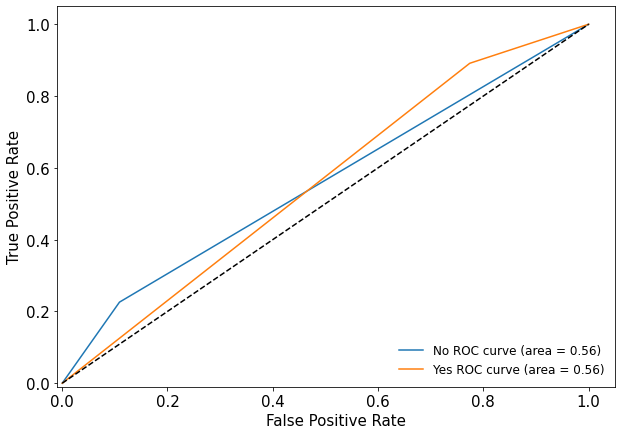

In [31]:
plt.figure(figsize=(10, 7))
for i in range(2):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.show()

## Cumulative gain

### Questo grafico ci serve per sapere quanti dati sono serviti per raggiungere il risultato ottenuto nel modello

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

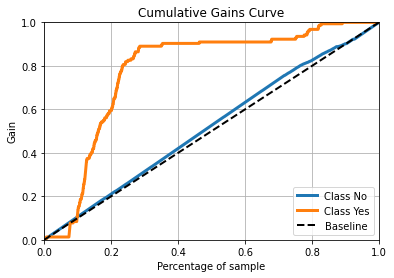

In [32]:
predicted_probabilities = clf.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

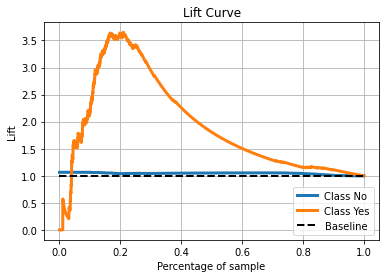

In [51]:
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities)

## Cross Validation del modello migliore

In [33]:
df_cross = df

df_cross.drop(columns=['split'], inplace=True)

attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf, X, y, cv=15)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=15, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=15, scoring='recall_macro')
print('recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8205 (+/- 0.50)
F1-score: 0.5302 (+/- 0.36)
recall: 0.6358 (+/- 0.33)


## Logistic Regression

In [42]:
scaler = StandardScaler()

In [43]:
#standardizzo i valori

In [44]:
Xs_train = scaler.fit_transform(X0_train)
Xs_test = scaler.fit_transform(X0_test)

In [45]:
clf_LR = LogisticRegression(random_state=0, solver = 'saga', max_iter= 10000)
clf_LR.fit(Xs_train, y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='saga')

In [46]:
ys_pred = clf_LR.predict(Xs_test)

print('Accuracy %s' % accuracy_score(y0_test, ys_pred))
print('F1-score %s' % f1_score(y0_test, ys_pred, average=None))
print(classification_report(y0_test, ys_pred))

Accuracy 0.9397590361445783
F1-score [0.9689441 0.       ]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.00      0.00      0.00       155

    accuracy                           0.94      2573
   macro avg       0.47      0.50      0.48      2573
weighted avg       0.88      0.94      0.91      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
ys_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
conf_mat = confusion_matrix(y0_test, ys_pred)
conf_mat

array([[2418,    0],
       [ 155,    0]])

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

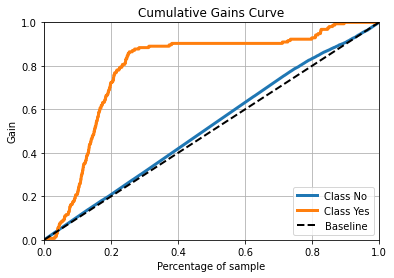

In [49]:
predicted_probabilities_LR = clf_LR.predict_proba(Xs_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y0_test, predicted_probabilities_LR)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

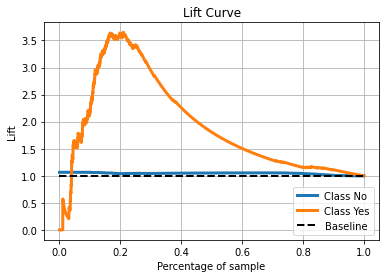

In [50]:
skplt.metrics.plot_lift_curve(y0_test, predicted_probabilities_LR)

#### Faccio la cross validation, ma siccome il numero di iterazioni è molto elevato (10000), i tempi di computazione sono altissimi. Anche la randomized search potrebbe essere estremamente dispendiosa per la ricerca dei parametri giusti, aumentando di molto il numero di iterazioni, ma in quel caso si può mettere più alto di 95 perché le combinazioni tra tutti i parametri possibili è 95

In [40]:
df_cross = df

#df_cross.drop(columns=['split'], inplace=True)

attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = scaler.fit_transform(df_cross[attributes].values)
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf_LR, X, y, cv=15)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_LR, X, y, cv=15, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_LR, X, y, cv=15, scoring='recall_macro')
print('recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9360 (+/- 0.07)
F1-score: 0.5155 (+/- 0.09)
recall: 0.5157 (+/- 0.05)
